# <center> <div style="width: 370px;"> ![weight](pictures/weight.jpg)

# <center> Weighted Graphs

A weighted graph is a graph where each edge has an associated numerical weight. The weight could represent things like:

- Distance between vertices 
- Cost of traversing an edge
- Capacity or bandwidth of an edge 

So rather than just representing connections between vertices, the edges now have values associated with them. 

Weighted graphs are commonly represented using:

- An adjacency matrix where each entry corresponds to the weight of an edge.

- An adjacency list where each edge in a vertex's list also stores the weight. 

Many key graph algorithms can be adapted to handle weights:

- Dijkstra's algorithm finds shortest paths on weighted graphs.

- Prim's algorithm finds minimum spanning trees using edge weights.

- Bellman-Ford handles graphs with negative edge weights.

- Kruskal's algorithm uses weights to find minimum spanning trees.

Some common applications of weighted graphs include:

- Road networks where edge weights represent distances.

- Flight routes with weights as costs or distances.

- Social networks with weights representing strength of connections.

- Supply chain networks with weights for shipping costs.

So in summary, weighted graphs associate numerical weights with edges, allowing modeling of real-world situations more effectively. Many fundamental graph algorithms rely on using these edge weights. Weighted graphs find application across transportation, logistics, networking, and more.

In various practical scenarios, there arises a need to assign numerical weights to edges within a graph. These weights can symbolize diverse attributes, such as road distances in a transportation network or compatibility scores in an online dating platform. In a weighted graph, denoted as G = (V, E), each edge is accompanied by a weight, represented as a real-valued value, via a weight function w: E → R.

In practice, edge weights are frequently embedded directly within the graph representation. Instead of maintaining a separate weight function, these values are often integrated into an adjacency matrix or encapsulated within edge objects stored in an adjacency list or set. Below are examples illustrating randomly weighted adjacency set representations for graphs:

```python
W1 = {0: {1: -2},
      1: {2: 0},
      2: {0: 1},
      3: {4: 3},
      4: {0: -1}}
      
W2 = {0: {1: 1, 3: 2, 4: -1},
      1: {0: 1},
      2: {3: 0},
      3: {0: 2, 2: 0},
      4: {0: -1}}
```

To retrieve these weights, a straightforward function like `w(u, v)` is employed, where `u` and `v` represent the vertices of an edge. This function delivers the weight of the edge `(u, v)` or of the edge `e` itself, simplifying the process of accessing edge weights.

Throughout our course, it is reasonable to assume that a weight function `w` can be stored using O(|E|) space and can swiftly furnish the weight of an edge in constant time. This streamlines our discussions regarding edge weights, allowing us to effortlessly refer to `w(u, v)` or `w(e)` for an edge `e = (u, v)`.

### Example

This code creates a weighted graph with cities as nodes and roads with distances as weighted edges. It then visualizes the graph, including labels for nodes and edge weights.

**Python Code:**

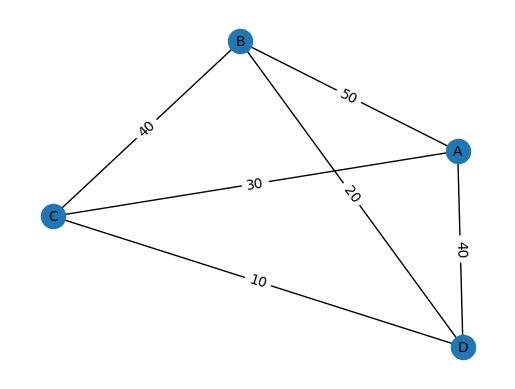

In [14]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a weighted graph
G = nx.Graph()

# Add nodes (cities)
cities = ["A", "B", "C", "D"]
G.add_nodes_from(cities)

# Add weighted edges (roads with distances)
edges_with_weights = [("A", "B", 50), ("A", "C", 30), 
                      ("B", "C", 40), ("B", "D", 20),
                      ("C", "D", 10), ("A", "D", 40)]
G.add_weighted_edges_from(edges_with_weights)

# Get edge labels (weights)
edge_labels = {(u, v): d["weight"] for u, v, d in G.edges(data=True)}

# Create a layout for visualizing the graph
pos = nx.spring_layout(G)

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_size=300)

# Draw edges
nx.draw_networkx_edges(G, pos)

# Draw labels
nx.draw_networkx_labels(G, pos, font_size=10, font_family="sans-serif")

# Draw edge labels (weights)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

# Display the graph
plt.axis("off")
plt.show()


**C++ Code:**

``` cpp
#include <iostream>
#include <vector>
#include <map>

// Define a struct for edges with weights
struct Edge {
    int from;
    int to;
    int weight;

    Edge(int from, int to, int weight) : from(from), to(to), weight(weight) {}
};

int main() {
    // Create a vector to store edges
    std::vector<Edge> edges;

    // Add weighted edges
    edges.push_back(Edge(0, 1, 50));
    edges.push_back(Edge(0, 2, 30));
    edges.push_back(Edge(1, 2, 40));
    edges.push_back(Edge(1, 3, 20));
    edges.push_back(Edge(2, 3, 10));

    // Print edges and their weights
    for (const Edge& edge : edges) {
        std::cout << "Edge (" << edge.from << " -> " << edge.to << ") Weight: " << edge.weight << std::endl;
    }

    return 0;
}
```

### Weighted Paths

- The ***weight*** w(π) of a path π in a weighted graph is the sum of weights of edges in the path
- The ***(weighted) shortest path*** from $s ∈ V$ to $t ∈ V$ is path of minimum weight from s to t
- $δ(s,t) = inf \{ w(π) | path \ π from \ s \ to \ t \}$ is the ***shortest-path weight*** from s to t
- (Often use “distance” for shortest-path weight in weighted graphs, not number of edges)
- As with unweighted graphs:
     - $δ(s,t) = ∞$ if no path from s to t
     - Subpaths of shortest paths are shortest paths (or else could splice in a shorter path)
- Why infimum not minimum? Possible that no finite-length minimum-weight path exists
- When? Can occur if there is a negative-weight cycle in the graph, $Ex: (b, f, g, c, b)$ in G1
- A ***negative-weight*** cycle is a path π starting and ending at same vertex with w(π) < 0
- $δ(s,t) = −∞$ if there is a path from s to t through a vertex on a negative-weight cycle
- If this occurs, don’t want a shortest path, but may want the negative-weight cycle

### Weighted Shortest Paths

**Weighted Shortest Paths**

In the realm of weighted graphs, a **weighted path** is a straightforward concept. It's a path within a weighted graph, where the weight of the path is the total sum of the weights associated with its edges. We often simplify our notation for weighted paths by letting $w(π)$ represent the sum of weights for the edges within the path, denoted as $π$. Formally, if $π = (v_1, . . . , v_k)$ is a weighted path, then $w(π) = \sum_{i=1}^{k-1} w(v_i, v_{i+1})$.

The problem of **weighted shortest paths**, specifically **single-source weighted shortest paths**, seeks to determine the lowest weight path from a specified source vertex `s` to every other vertex `v` within the graph. Alternatively, it may indicate that there exists no path with lower weight from `s` to `v`. Solving this problem is relatively straightforward in cases where all edge weights are both positive and equal, as we can employ breadth-first search from *s* to minimize the number of edges traversed, consequently minimizing the path weight.

However, when edges in the graph possess differing or non-positive weights, applying breadth-first search directly becomes unfeasible. In fact, if the graph contains a cycle—a path that starts and ends at the same vertex—with negative weight, certain shortest paths may not even exist. This is due to the fact that, for any path containing a vertex from the negative-weight cycle, a shorter path can be found simply by circumnavigating the cycle. Consequently, if any path from `s` to a given vertex `v` includes a vertex from a negative-weight cycle, we consider the shortest path from `s` to `v` as undefined, assigning it a weight of `-∞`. If no path exists from `s` to `v`, we similarly label the shortest path as undefined, but with a weight of `+∞`.

In addition to breadth-first search, we will delve into three additional algorithms for computing single-source shortest paths, each tailored to address the distinctive characteristics of different types of weighted graphs.

|Restrictions||SSSP Algorithm||
|-----|----|-----|------|
Graph|Weights|Name|Running Time (O(·))|
|  General| Unweighted  |  BFS | $$ |V|+|E| $$   |     |V| + |E|       |
| DAG |Any| DAG Relaxation       |              $$ |V|+|E| $$              |     |V| + |E|       |
|            General| Any              |     Bellman-Ford         |   $$ |V| \dot |E| $$              |         |V| · |E|     |   General
|    General|              Non-negative                  |       Dijkstra           |              $$ |V| \log |V| + |E|       $$        |                     |


### DAG Relaxation

- **Idea!** Maintain a distance estimate $d(s, v) (initially ∞)$ for each vertex $v ∈ V$ , that always upper bounds true distance $δ(s, v)$, then gradually lowers until $d(s, v) = δ(s, v)$
- When do we lower? When an edge violates the triangle inequality!
- Triangle Inequality: the shortest-path weight from `u` to `v` cannot be greater than the shortest path from `u` to `v` through another vertex $x, \ i.e., \ δ(u, v) ≤ δ(u, x) +δ(x, v) for \ all \ u, \ v, x ∈ V$
- If $d(s, v) > d(s, u) + w(u, v)$ for some edge $(u, v)$, then triangle inequality is violated :(
- Fix by lowering $d(s, v) to d(s, u) + w(u, v), \ i.e., \ relax (u, v)$ to satisfy violated constraint
- **Claim:** Relaxation is safe: maintains that each $d(s, v)$ is weight of a path to `v` (or ∞)$ ∀v ∈ V$
- **Proof:** Assume $d(s, v_0 )$ is weight of a path (or ∞) for all $v_0 ∈ V$ . Relaxing some edge $(u, v)$ sets $d(s, v)$ to $d(s, u) + w(u, v)$, which is the weight of a path from `s` to `v` through `u`.

- Set d(s, v) = ∞ for all v ∈ V , then set d(s, s) = 0
- Process each vertex u in a topological sort order of G:

```algorihtm
     - For each outgoing neighbor v ∈ Adj+(u):
         - If d(s, v) > d(s, u) + w(u, v):
             - relax edge (u, v), i.e., set d(s, v) = d(s, u) + w(u, v)
```

**Claim:** The DAG Relaxation algorithm computes shortest paths in a directed acyclic graph. 

**Proof:** We prove that at termination, $d(s, v) = δ(s, v)$ for all $v ∈ V$ . First observe that Safety ensures that a vertex not reachable from `s` will retain $d(s, v) = +∞$ at termination. Alternatively, consider any shortest path $π = (v_1, . . . , v_m)$ from $v_1 = s$ to any vertex $v_m = v $ reachable from `s`. The topological sort order ensures that edges of the path are relaxed in the order in which they appear in the path. Assume for induction that before edge $(v_i, v_{i+1}) ∈ π$ is relaxed, $d(s, v_i) = δ(s, v_i)$. Setting $d(s, s) = 0$ at the start provides a base case. Then relaxing edge $(v_i, v_{i+1})$ sets $d(s, v_{i+1}) = δ(s, v_i) + w(v_i, v_{i+1}) = δ(s, v_{i+1})$, as sub-paths of shortest paths are also shortest paths. Thus the procedure constructs shortest path weights as desired. Since depthfirst search runs in linear time and the loops relax each edge exactly once, this algorithm takes `O(|V | + |E|)` time. 